<a href="https://colab.research.google.com/github/unt-iialab/INFO5731_Spring2020/blob/master/Assignments/INFO5731_Assignment_Three.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
# Write your code here

import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [2]:
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
!pip install selenium

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:8 http://security.ubuntu.com/ubuntu jammy-security/multiverse amd64 Packages [44.0 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/multiverse amd64 Packages [49.8 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,473 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntug

In [4]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait as wait
from selenium.webdriver.common.by import By
import pandas as pd
import time
# Setting up Chrome options for headless mode
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('-headless')
chrome_options.add_argument('-no-sandbox')
chrome_options.add_argument('-disable-dev-shm-usage')
driver = webdriver.Chrome(options=chrome_options)

In [22]:
from google.colab import files
uploaded=files.upload()


Saving book_reviews.csv to book_reviews.csv


In [23]:
book_reviews=pd.read_csv('book_reviews.csv')
print(book_reviews)

                                               reviews
0    Minalima's interactive papercraft is always be...
1    Minalima's interactive papercraft is always be...
2    I'm a happy camper such beautiful well thought...
3    Minalima's interactive papercraft is always be...
4    I'm a happy camper such beautiful well thought...
..                                                 ...
270  Gorgeous book with high quality, vibrantly pri...
271  Like the first two, this book is wonderfully d...
272  I’ve been impatiently waiting for the release ...
273  As other reviews have stated, how this is ship...
274  This is the 3rd one I’ve bought in the series ...

[275 rows x 1 columns]


In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
#Creating a new column called 'reviews_lower' in the DataFrame to store the reviews in lowercase
book_reviews['reviews_lower'] = book_reviews['reviews'].apply(lambda x: " ".join(x.lower() for x in x.split()))

#Creating a new column called 'reviews_no_punctuation' in the DataFrame to store the reviews without punctuation
book_reviews['reviews_no_punctuation'] = book_reviews['reviews_lower'].str.replace('[^\w\s]', '')

#Importing the 're' module for regular expressions
import re
#Creating a new column 'reviews_no_special_chars' in the DataFrame
book_reviews['reviews_no_special_chars'] = book_reviews['reviews_no_punctuation'].apply(lambda x: ''.join(re.sub(r"[^a-zA-Z0-9]+", ' ', char) for char in x))

#Importing the 'stopwords' module from nltk
from nltk.corpus import stopwords
#Loading the English stopwords
stop = stopwords.words('english')
#Creating a new column 'reviews_no_stopwords' in the DataFrame
book_reviews['reviews_no_stopwords'] = book_reviews['reviews_no_punctuation'].apply(lambda x: " ".join(x for x in x.split() if x.lower() not in stop))

#Importing the 'TextBlob' class from the 'textblob' module
from textblob import TextBlob
#Creating a new column 'reviews_spelling_corrected' in the DataFrame
book_reviews['reviews_spelling_corrected'] = book_reviews['reviews_no_stopwords'].apply(lambda x: str(TextBlob(x).correct()))

#Importing the 'nltk' module for natural language processing tasks
import nltk
nltk.download('punkt')
#Creating a new column 'reviews_tokenized' in the DataFrame
book_reviews['reviews_tokenized'] = book_reviews['reviews_spelling_corrected'].apply(lambda x: TextBlob(x).words)


#Importing the 'PorterStemmer' class from the 'nltk.stem' module
from nltk.stem import PorterStemmer
#Creating an instance of PorterStemmer
ps = PorterStemmer()
#Creating a new column 'reviews_stemmed' in the DataFrame
book_reviews['reviews_stemmed'] = book_reviews['reviews_tokenized'].apply(lambda x: " ".join([ps.stem(word) for word in x]))

#Importing the 'Word' class from the 'textblob' module and the 'nltk' module for lemmatization
from textblob import Word
import nltk
nltk.download('wordnet')
#Creating a new column 'reviews_lemmatized' in the DataFrame
book_reviews['reviews_lemmatized'] = book_reviews['reviews_stemmed'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

book_reviews.to_csv('book_reviews.csv',index=False)
book_reviews


<ipython-input-27-de592e653e82>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  book_reviews['reviews_no_punctuation'] = book_reviews['reviews_lower'].str.replace('[^\w\s]', '')
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,reviews,reviews_lower,reviews_no_punctuation,reviews_no_special_chars,reviews_no_stopwords,reviews_spelling_corrected,reviews_tokenized,reviews_stemmed,reviews_lemmatized
0,Minalima's interactive papercraft is always be...,minalima's interactive papercraft is always be...,minalimas interactive papercraft is always bea...,minalimas interactive papercraft is always bea...,minalimas interactive papercraft always beauti...,minalimas interactive papercraft always beauti...,"[minalimas, interactive, papercraft, always, b...",minalima interact papercraft alway beauti grim...,minalima interact papercraft alway beauti grim...
1,Minalima's interactive papercraft is always be...,minalima's interactive papercraft is always be...,minalimas interactive papercraft is always bea...,minalimas interactive papercraft is always bea...,minalimas interactive papercraft always beauti...,minalimas interactive papercraft always beauti...,"[minalimas, interactive, papercraft, always, b...",minalima interact papercraft alway beauti grim...,minalima interact papercraft alway beauti grim...
2,I'm a happy camper such beautiful well thought...,i'm a happy camper such beautiful well thought...,im a happy camper such beautiful well thought ...,im a happy camper such beautiful well thought ...,im happy camper beautiful well thought pull ou...,in happy hamper beautiful well thought pull ou...,"[in, happy, hamper, beautiful, well, thought, ...",in happi hamper beauti well thought pull out p...,in happi hamper beauti well thought pull out p...
3,Minalima's interactive papercraft is always be...,minalima's interactive papercraft is always be...,minalimas interactive papercraft is always bea...,minalimas interactive papercraft is always bea...,minalimas interactive papercraft always beauti...,minalimas interactive papercraft always beauti...,"[minalimas, interactive, papercraft, always, b...",minalima interact papercraft alway beauti grim...,minalima interact papercraft alway beauti grim...
4,I'm a happy camper such beautiful well thought...,i'm a happy camper such beautiful well thought...,im a happy camper such beautiful well thought ...,im a happy camper such beautiful well thought ...,im happy camper beautiful well thought pull ou...,in happy hamper beautiful well thought pull ou...,"[in, happy, hamper, beautiful, well, thought, ...",in happi hamper beauti well thought pull out p...,in happi hamper beauti well thought pull out p...
...,...,...,...,...,...,...,...,...,...
270,"Gorgeous book with high quality, vibrantly pri...","gorgeous book with high quality, vibrantly pri...",gorgeous book with high quality vibrantly prin...,gorgeous book with high quality vibrantly prin...,gorgeous book high quality vibrantly printed p...,gorgeous book high quality vibrantly printed p...,"[gorgeous, book, high, quality, vibrantly, pri...",gorgeou book high qualiti vibrantli print page...,gorgeou book high qualiti vibrantli print page...
271,"Like the first two, this book is wonderfully d...","like the first two, this book is wonderfully d...",like the first two this book is wonderfully do...,like the first two this book is wonderfully do...,like first two book wonderfully done love addi...,like first two book wonderfully done love addi...,"[like, first, two, book, wonderfully, done, lo...",like first two book wonder done love addit int...,like first two book wonder done love addit int...
272,I’ve been impatiently waiting for the release ...,i’ve been impatiently waiting for the release ...,ive been impatiently waiting for the release o...,ive been impatiently waiting for the release o...,ive impatiently waiting release book well wort...,give impatiently waiting release book well wor...,"[give, impatiently, waiting, release, book, we...",give impati wait releas book well worth wait e...,give impati wait releas book well worth wait e...
273,"As other reviews have stated, how this is ship...","as other reviews have stated, how this is ship...",as other reviews have stated how t

In [54]:
import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
import pandas as pd

reviews_array = []

# Tokenizing each lemmatized review and filtering out empty lists
for review in book_reviews['reviews_lemmatized']:
    reviews_array.append(word_tokenize(review))

cleaned_reviews = [tokens for tokens in reviews_array if tokens != []]
all_tokens = list(itertools.chain.from_iterable(cleaned_reviews))

# Trigrams
trigrams = list(ngrams(all_tokens, 3))
trigram_freq_dist = nltk.FreqDist(trigrams)

# Printing trigram frequencies
for trigram, count in trigram_freq_dist.items():
    print(f"Trigram: {trigram}, Count: {count}")

# Bigrams
bigrams = list(ngrams(all_tokens, 2))
bigram_freq_dist = nltk.FreqDist(bigrams)

# Printing bigram frequencies along with conditional probability
for bigram, count in bigram_freq_dist.items():
    # Calculate conditional probability for each bigram
    probability = count / all_tokens.count(bigram[0])
    print(f"Bigram: {bigram}, Count: {count}, Conditional Probability: {probability:.4f}")

Trigram: ('minalima', 'interact', 'papercraft'), Count: 50
Trigram: ('interact', 'papercraft', 'alway'), Count: 50
Trigram: ('papercraft', 'alway', 'beauti'), Count: 50
Trigram: ('alway', 'beauti', 'grim'), Count: 50
Trigram: ('beauti', 'grim', 'uncov'), Count: 50
Trigram: ('grim', 'uncov', 'teach'), Count: 50
Trigram: ('uncov', 'teach', 'move'), Count: 50
Trigram: ('teach', 'move', 'footstep'), Count: 50
Trigram: ('move', 'footstep', 'maraud'), Count: 50
Trigram: ('footstep', 'maraud', 'map'), Count: 50
Trigram: ('maraud', 'map', 'absolut'), Count: 50
Trigram: ('map', 'absolut', 'brilliant'), Count: 50
Trigram: ('absolut', 'brilliant', 'creativ'), Count: 50
Trigram: ('brilliant', 'creativ', 'detail'), Count: 50
Trigram: ('creativ', 'detail', 'photo'), Count: 50
Trigram: ('detail', 'photo', 'monster'), Count: 50
Trigram: ('photo', 'monster', 'book'), Count: 50
Trigram: ('monster', 'book', 'monster'), Count: 50
Trigram: ('book', 'monster', 'favorit'), Count: 50
Trigram: ('monster', 'fav

In [32]:
from collections import Counter
from nltk import bigrams

token_bigrams = list(bigrams(all_tokens))

# Creating a frequency distribution for the bigrams
bigram_freq_dist = nltk.FreqDist(token_bigrams)

# Converting the frequency distribution to a dictionary
bigram_dict = dict(bigram_freq_dist)

# Calculating and printing conditional probabilities for each bigram
for bigram, count in bigram_dict.items():
    # Calculating conditional probability for each bigram
    conditional_prob = count / all_tokens.count(bigram[1])

    # Printing the bigram and its conditional probability
    print(f"Bigram: {bigram}, Conditional Probability: {conditional_prob:.4f}")


Bigram: ('minalima', 'interact'), Conditional Probability: 0.7143
Bigram: ('interact', 'papercraft'), Conditional Probability: 1.0000
Bigram: ('papercraft', 'alway'), Conditional Probability: 0.5882
Bigram: ('alway', 'beauti'), Conditional Probability: 0.3125
Bigram: ('beauti', 'grim'), Conditional Probability: 1.0000
Bigram: ('grim', 'uncov'), Conditional Probability: 1.0000
Bigram: ('uncov', 'teach'), Conditional Probability: 1.0000
Bigram: ('teach', 'move'), Conditional Probability: 0.5000
Bigram: ('move', 'footstep'), Conditional Probability: 1.0000
Bigram: ('footstep', 'maraud'), Conditional Probability: 1.0000
Bigram: ('maraud', 'map'), Conditional Probability: 1.0000
Bigram: ('map', 'absolut'), Conditional Probability: 0.3125
Bigram: ('absolut', 'brilliant'), Conditional Probability: 1.0000
Bigram: ('brilliant', 'creativ'), Conditional Probability: 0.5556
Bigram: ('creativ', 'detail'), Conditional Probability: 0.2222
Bigram: ('detail', 'photo'), Conditional Probability: 0.5263
B

In [34]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

In [55]:
# Initialize variables for concatenated data, review labels, and count
concatenated_data = ''
review_labels = []
count = 1

# Concatenate lemmatized reviews and create review labels
for review in book_reviews['reviews_lemmatized']:
    concatenated_data += review
    label = 'Review-' + str(count)
    review_labels.append(label)
    count += 1

# Import necessary libraries
from textblob import TextBlob
import pandas as pd

# Initialize lists for noun phrases and their frequencies
noun_phrases = []
frequencies = []

# Extract noun phrases and their frequencies from lemmatized reviews
for review in book_reviews['reviews_lemmatized']:
    blob = TextBlob(review)
    for noun_phrase in blob.noun_phrases:
        noun_phrases.append(noun_phrase)

# Calculate the frequency of each noun phrase in each review
for phrase in noun_phrases:
    frequency_per_review = []
    for review in book_reviews['reviews_lemmatized']:
        frequency_per_review.append(review.count(phrase) / concatenated_data.count(phrase))
    frequencies.append(frequency_per_review)

# Create a DataFrame with noun phrase frequencies
noun_phrases_data = pd.DataFrame(frequencies).T
noun_phrases_data.columns = list(noun_phrases)
noun_phrases_data['Review_Label'] = review_labels

# Display the DataFrame
noun_phrases_data


,minalima interact papercraft alway beauti grim uncov,footstep maraud map absolut,brilliant creativ detail photo monster book monster favorit detail,actual season detail edg halloween christma alreadi origin,book hardcov kindl audibl,art book,minalima version magic remind origin imag,chapter encapsul way imagin ward world,absolut stun addit shelf alreadi look,primarili adult,...,bogart wardrob,review state ship issu book,wrap plastic place box,brown pack paper provid,corner book sinc book abl slide,damag minim look,crinkl corner insid book cunningli beauti complaint,seri disappoint illustr,excit fenc,Review_Label
0,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-1
1,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-2
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-3
3,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-4
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-271
271,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-272
272,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.066667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Review-273
273,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000000,0.1,0.1,0.1,0.1,0.1,0.1,0.0,0.0,Review-274


# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [57]:
# TF-IDF Calculation
import math
import pandas as pd

reviews = book_reviews["reviews_spelling_corrected"].values.tolist()

# Extracting unique words from all reviews
unique_words = set([word for review in reviews for word in review.split(" ")])

# Creating a DataFrame to store tf-idf values for each word in each review
tf_idf_matrix = pd.DataFrame(unique_words, columns=["words"])
review_count = 1

# Function to calculate tf-idf for a word in a given sentence
def calculate_tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Calculating tf-idf values for each word in each review
for sentence in reviews:
    tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, sentence))
    review_count += 1

# Displaying the tf-idf matrix
tf_idf_matrix

<ipython-input-57-60f4a63f3673>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, sentence))
<ipython-input-57-60f4a63f3673>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, sentence))
<ipython-input-57-60f4a63f3673>:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.inse

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review266,Review267,Review268,Review269,Review270,Review271,Review272,Review273,Review274,Review275
0,still,0.022096,0.022096,0.0,0.022096,0.0,0.000000,0.022096,0.0,0.000000,...,0.022096,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
1,may,0.022096,0.022096,0.0,0.022096,0.0,0.000000,0.022096,0.0,0.000000,...,0.022096,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2,wait,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.054422,0.0,0.067303,0.000000,0.0
3,placed,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.040797,0.0
4,paper,0.022096,0.022096,0.0,0.022096,0.0,0.000000,0.022096,0.0,0.000000,...,0.022096,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.040797,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,possibly,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.041573,0.000000,0.0
254,another,0.000000,0.000000,0.0,0.000000,0.0,0.046016,0.000000,0.0,0.046016,...,0.000000,0.0,0.046016,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
255,designs,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.0,0.054422,0.000000,0.0,0.000000,0.000000,0.0
256,brilliant,0.022096,0.022096,0.0,0.022096,0.0,0.000000,0.022096,0.0,0.000000,...,0.022096,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [58]:
# Cosine Similarity Calculation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample search sentence
search_sentence = "Another wonderfully illustrated pop-up book by MinaLima. I was so happy with the first two books and got this 3rd one on my birthday. What a grand treat. Hats off to them for their beautiful and creativity imaginative illustrations. Book arrived shrink wrapped and in excellent condition. Definitely a must-have for Harry Potter fans and book collectors."

# Tokenizing and removing stopwords from the search sentence
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

# Function to create a feature vector and calculating cosine similarity
def cosine_similarity(X_set, Y_set):
    r_vector = X_set.union(Y_set)
    list1 = []; list2 = []
    for j in r_vector:
        if j in X_set:
            list1.append(1)
        else:
            list1.append(0)
        if j in Y_set:
            list2.append(1)
        else:
            list2.append(0)
    count = sum(list1_i * list2_i for list1_i, list2_i in zip(list1, list2))
    try:
        similarity = count / float((sum(list1)*sum(list2))**0.5)
    except ZeroDivisionError:
        similarity = 'None'
    return similarity

# Calculating cosine similarity for each review
cosine_similarities = []
for review in book_reviews['reviews_spelling_corrected']:
    Y_list = word_tokenize(review)
    Y_set = {k for k in Y_list if not k in stop_word}
    similarity = cosine_similarity(X_set, Y_set)
    cosine_similarities.append(similarity)

# Creating a DataFrame with reviews and their cosine similarities
cosine_similarity_data = pd.DataFrame(list(zip(book_reviews['reviews'], cosine_similarities)), columns=['reviews', 'cosine_similarity'])
cosine_similarity_data

,reviews,cosine_similarity
0,Minalima's interactive papercraft is always be...,0.094967
1,Minalima's interactive papercraft is always be...,0.094967
2,I'm a happy camper such beautiful well thought...,0.087039
3,Minalima's interactive papercraft is always be...,0.094967
4,I'm a happy camper such beautiful well thought...,0.087039
...,...,...
270,"Gorgeous book with high quality, vibrantly pri...",0.066667
271,"Like the first two, this book is wonderfully d...",0.154746
272,I’ve been impatiently waiting for the release ...,0.085749
273,"As other reviews have stated, how this is ship...",0.140859


# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [59]:
# Installing or upgrading Gensim library
!pip install --upgrade gensim

# Importing necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

docs = [review.split() for review in book_reviews['reviews_lemmatized'] if str(review) != 'nan' and str(review) != '']

# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Getting the list of words in the vocabulary
words = list(word2vec_model.wv.index_to_key)
print(words)


['book', 'detail', 'page', 'love', 'minalima', 'absolut', 'read', 'beauti', 'version', 'give', 'buy', 'illustr', 'happi', 'one', 'in', 'first', 'favorit', 'definit', 'use', 'monster', 'care', 'child', 'art', 'alreadi', 'origin', 'move', 'photo', 'though', 'christma', 'five', 'look', 'thought', 'imagin', 'creativ', 'take', 'he', 'alway', 'forward', 'stun', 'want', 'done', 'even', 'interact', 'addit', 'also', 'harri', 'porter', 'throughout', 'amaz', 'edg', 'experi', 'fun', 'issu', 'design', 'two', 'wonder', 'well', 'come', 'pour', 'collect', 'wait', 'actual', 'halloween', 'bought', 'papercraft', 'season', 'teach', 'shrink', 'map', 'maraud', 'hardcov', 'footstep', 'grim', 'uncov', 'brilliant', 'kindl', 'world', 'remind', 'came', 'later', 'way', 'encapsul', 'shelf', 'chapter', 'start', 'next', 'imag', 'primarili', 'thing', 'adult', 'let', 'magic', '913', 'still', 'never', 'may', 'jim', 'audibl', 'ward', 'wrap', 'littl', 'rd', 'twelv', 'pull', 'out', 'bend', 'tear', 'easi', 'studi', 'lot', 

In [60]:
# Saving the Word2Vec model in binary format and as a whole model
word2vec_model.wv.save_word2vec_format('word2vec_model.bin')
word2vec_model.save('word2vec_model')

# Extracting word vectors and performing PCA for dimensionality reduction
word_vectors = word2vec_model.wv[word2vec_model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

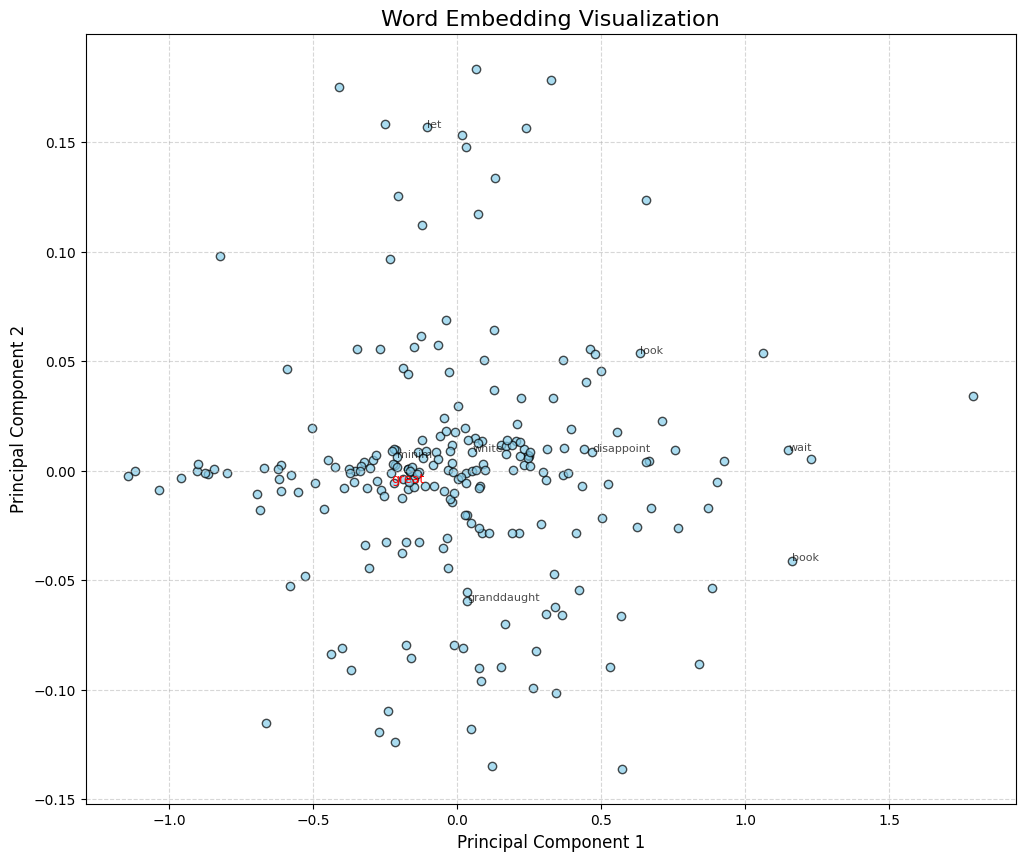

In [61]:
# Creating a scatter plot of the word vectors with visual enhancements
plt.figure(figsize=(12, 10))
plt.scatter(result[:, 0], result[:, 1], color='skyblue', edgecolor='black', alpha=0.7)

# Annotating points with words, emphasizing a subset of words for better visibility
highlighted_words = ['great', 'interesting', 'exciting', 'positive', 'creative']
for i, word in enumerate(words):
    if word in highlighted_words:
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), color='red', fontsize=9, ha='right', va='bottom')
    elif i % 30 == 0:  # Show every 30th word to avoid clutter
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8, alpha=0.7)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a title and labels with a larger font size
plt.title('Word Embedding Visualization', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Showing the plot
plt.show()

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [62]:
# The GitHub link of your final csv file



# Link: https://github.com/shreya-612/shreya_INFO5731_Fall2023/blob/main/book_reviews_sentiment_analysis.csv



